In [28]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [29]:
X, y = mnist['data'], mnist['target']
y.reshape(y.shape[0], 1)
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


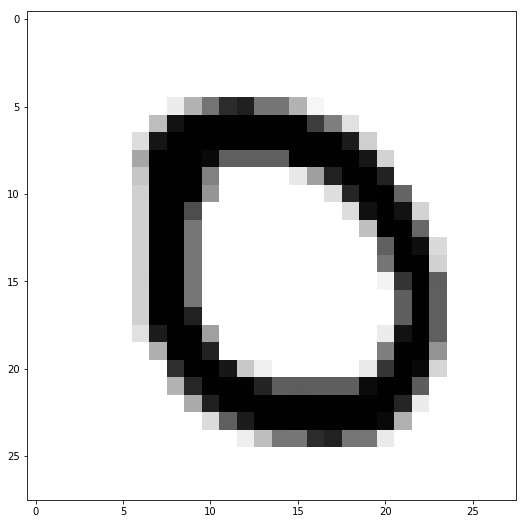

0.0


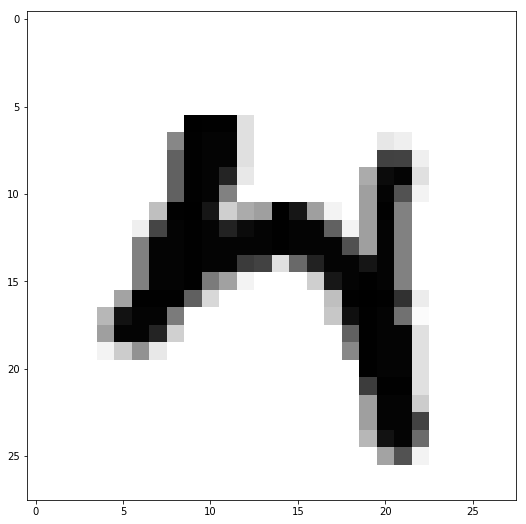

4.0


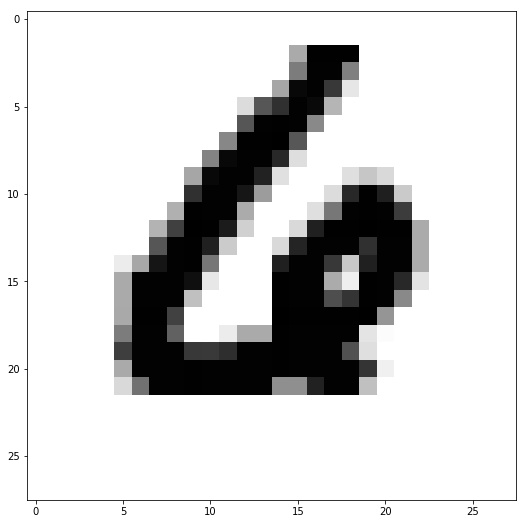

6.0


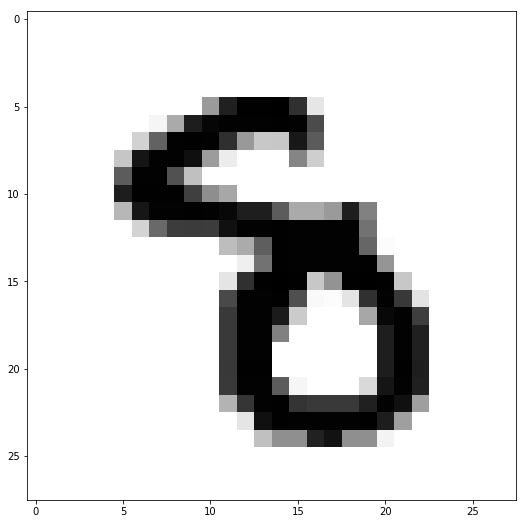

8.0


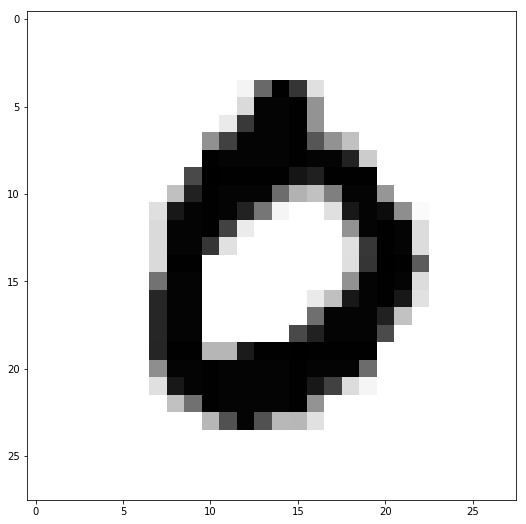

0.0


In [30]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

for n in [2000, 30000, 40000, 50000, 60000]:
    some_digit = X[n]
    some_digit_image = some_digit.reshape(28, 28)
    plt.figure(figsize=(9,9))
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')
    plt.show()
    print (y[n])

In [31]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

/Users/mqbssra6/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [5]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring = 'accuracy')

array([ 0.94255,  0.95705,  0.96645])

In [6]:
from sklearn.model_selection import cross_val_predict

y_train_predict = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [7]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_predict)

array([[53406,  1173],
       [ 1506,  3915]])

In [8]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_predict)

0.74507564944333426

In [10]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method = "decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

ValueError: bad input shape (60000, 2)

In [11]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [16]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring='accuracy')

array([ 0.93991202,  0.94019701,  0.94094114])

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring='accuracy')

array([ 0.93991202,  0.94019701,  0.94094114])

In [18]:
y_train_predict = cross_val_predict(forest_clf, X_train_scaled, y_train, cv=3)

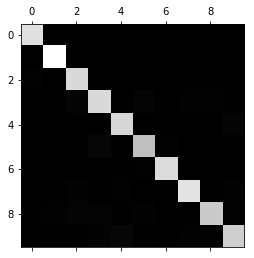

In [24]:
conf_mx = confusion_matrix(y_train, y_train_predict)
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

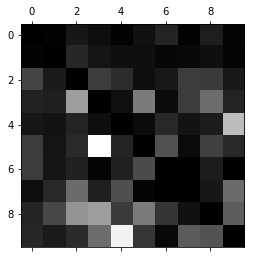

In [27]:
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import expon, reciprocal

param_distribs = {
    'weights': ['uniform', 'distance']),
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
}

random = RandomizedSearchCV(KN, param_distributions = param_distribs, n_iter = 10, cv = 3, verbose = 2, n_jobs = 30, random_state = 42)
random.fit(X_train, y_train)
cross_val_score(KN, X_test, y_test, cv=3, scoring='accuracy')

In [ ]:
random.best_params_